In [ ]:
# Pedro Henrique Pinheiro Carvalho
# RM551918
# 2ECA

In [1]:
# Iniciações de bibliotecas.

from qiskit import QuantumCircuit, transpile, QuantumRegister, ClassicalRegister
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session, Options
service = QiskitRuntimeService(channel="ibm_quantum")
import numpy as np

# Iniciação do simulador
from qiskit_aer import AerSimulator
simulador = AerSimulator()

qiskit_runtime_service.__init__:INFO:2024-04-13 23:56:48,673: Default instance: ibm-q/open/main


In [2]:
def QntConjuntosParOuImpar(arvores):
    
    qnt_espacos = len(arvores) # Medindo a quantidade de espaços inseridos.

    # Iniciando o circuíto quântico com a quantidade de espaços inseridos na formatação do problema.
    qreg_q = QuantumRegister(qnt_espacos+1, 'q')
    global circuit
    circuit = QuantumCircuit(qreg_q)

    circuit.x(qreg_q[qnt_espacos])
    
    # Inserindo as portas no circuíto.
    # 1.
    for i in range(0, qnt_espacos): 
        if arvores[i] == 1: # Negando os qubits que contenham "árvores".
            circuit.x(qreg_q[i])
        circuit.x(qreg_q[i]) # Negando todas os qubits.
    
    # 2.
    for i in range (1, qnt_espacos-1):
        circuit.cx(qreg_q[i], qreg_q[qnt_espacos]) # Inserindo portas cx, sendo os qubits de controle todos menos o primeiro e o penúltimo, e o último qubit como alvo.

    # 3.
    for i in range (0, qnt_espacos-1):
        circuit.ccx(qreg_q[i], qreg_q[i+1], qreg_q[qnt_espacos]) # Inserindo portas ccx, sendo os qubits de controle uma sequência de nQubit e seu sucessor, e o último qubit como alvo.
        
    # EXPLICAÇÃO:
    # Regra 1. Tendo o último qubit (qR) como o resultado das operações (0 para par e 1 para ímpar), a cada "pedra ou 0" encontrado em algum qubit, o estado de qR inverterá com o uso da porta cx (menos no primeiro e último. Regra 3.)
    # Regra 2. Para solucionar casos de pedras em sequência (como em [1, 0, 0, 1, 1, 1, 1, 1]), utilizo portas ccx que detectam esse cenário e "cancelam" uma das inverões realizadas no qR.
    # Regra 3. Por fim, para solucionar os casos de pedras no primeiro e último qubits, apenas desconsideramos a regra 1. nesses.
        
    # Medindo o circuíto.
    circuit.measure_all()

    # Exibindo a medição do qubit 8 resultou em 0 (para par) ou 1 (para ímpar).
    resultado = list(simulador.run(circuit).result().get_counts(circuit).keys())
    
    # Retornando apenas o resultado da medição do último qubit.
    return int(resultado[0][0])

Entrada:  [0, 0, 1, 1, 1, 1, 1, 1]
Saida:  1


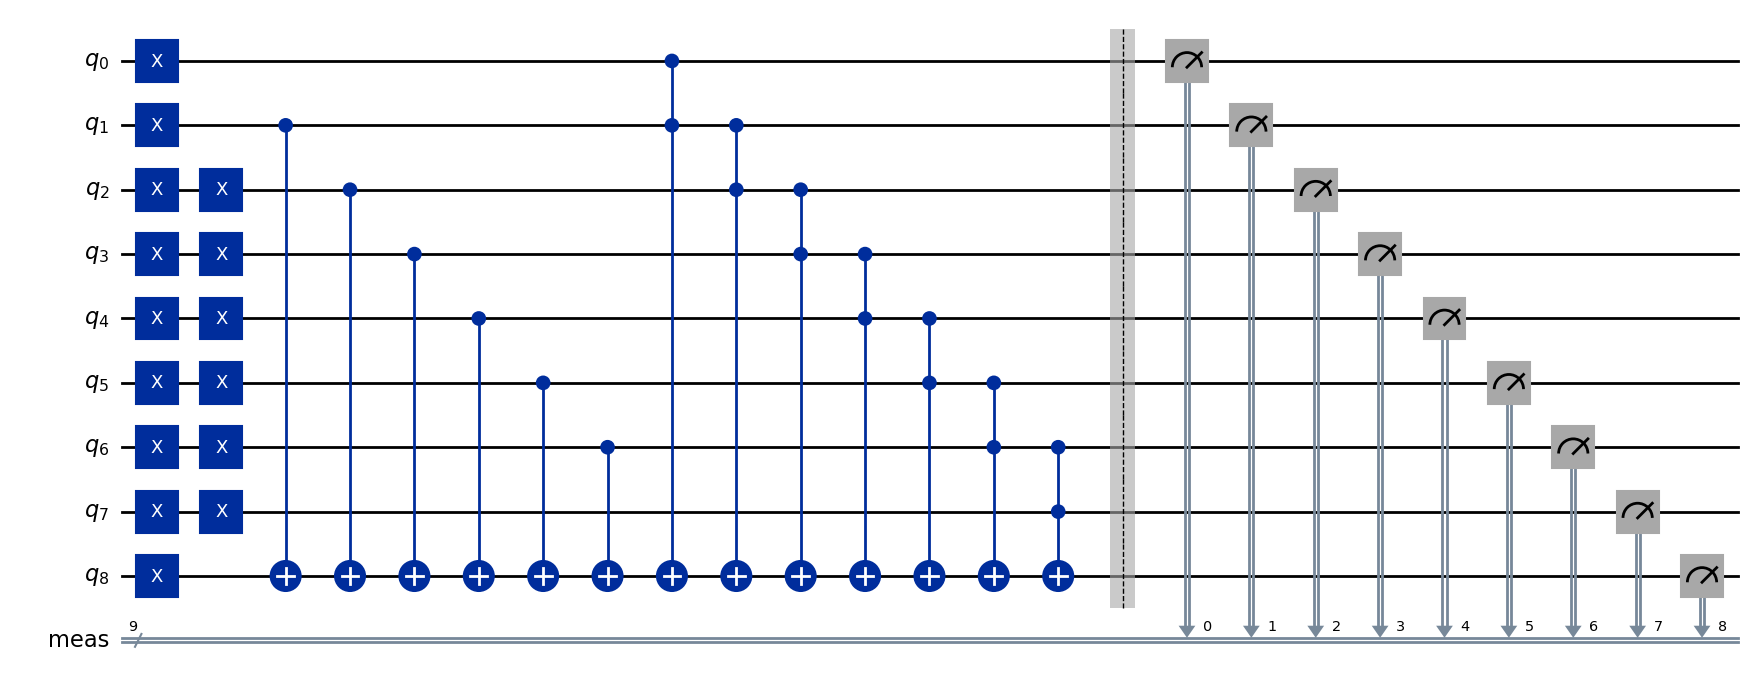

In [3]:
# Executando a função
listaArvores = [0,0,1,1,1,1,1,1]

# Exibindo o resultado
print("Entrada: ", listaArvores)
print("Saida: ", QntConjuntosParOuImpar(listaArvores)) # 0 -> Par; 1 -> Ímpar

# Exibindo o circuíto
circuit.draw("mpl")